In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style='darkgrid')
import matplotlib.pyplot as plt

In [2]:
def plot(df, y, sd):
    palette = sns.color_palette('viridis', len(df['Algorithm'].unique()))
    examples = df.groupby('Example')

    fig, axs = plt.subplots(1, len(examples), figsize=(15,6))
    
    for (example_name, example_df), ax in zip(examples, axs):
        example_df.reset_index(inplace=True)
        
        sns.barplot(example_df, x='Algorithm', y=y, hue='Algorithm', legend=False, palette=palette, ax=ax)
        ax.errorbar(example_df.index, example_df[y], yerr=example_df[sd], ecolor='black', fmt='none', capsize=2)
        
        ax.set_title(example_name)
        ax.tick_params(axis='x', labelrotation=45)
        ax.set_xlabel(None)
        ax.set_ylabel(None)
    
    fig.supylabel(y)
    fig.tight_layout()
    plt.show()

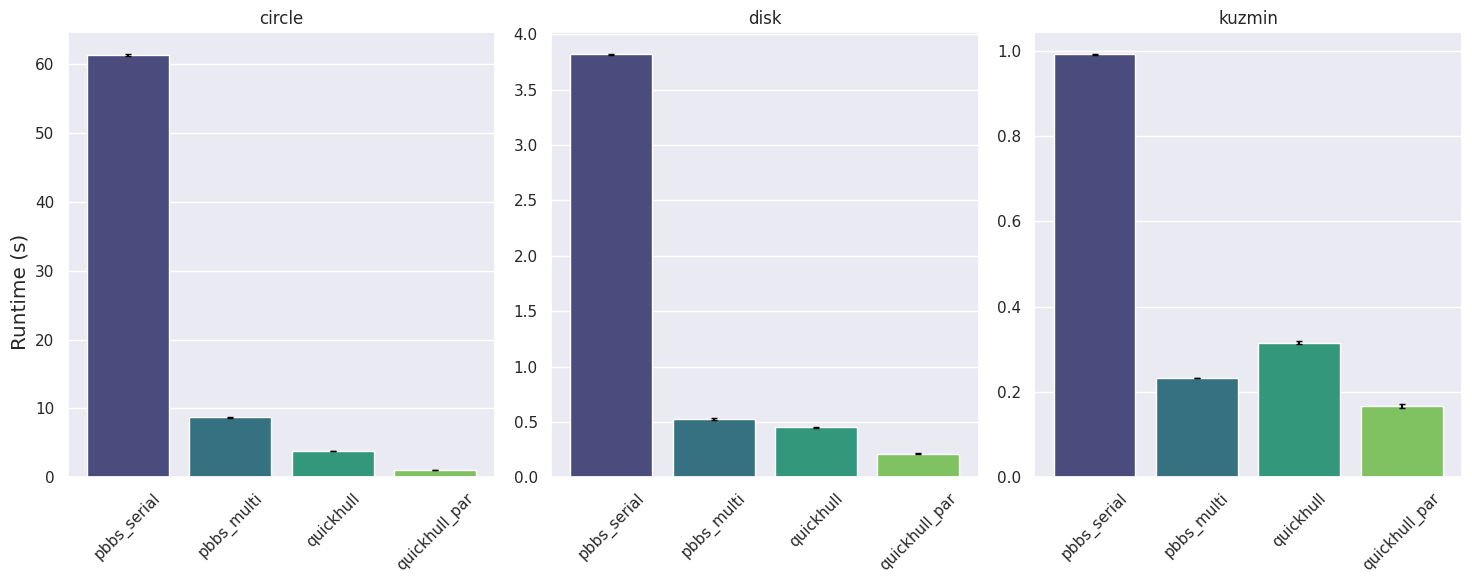

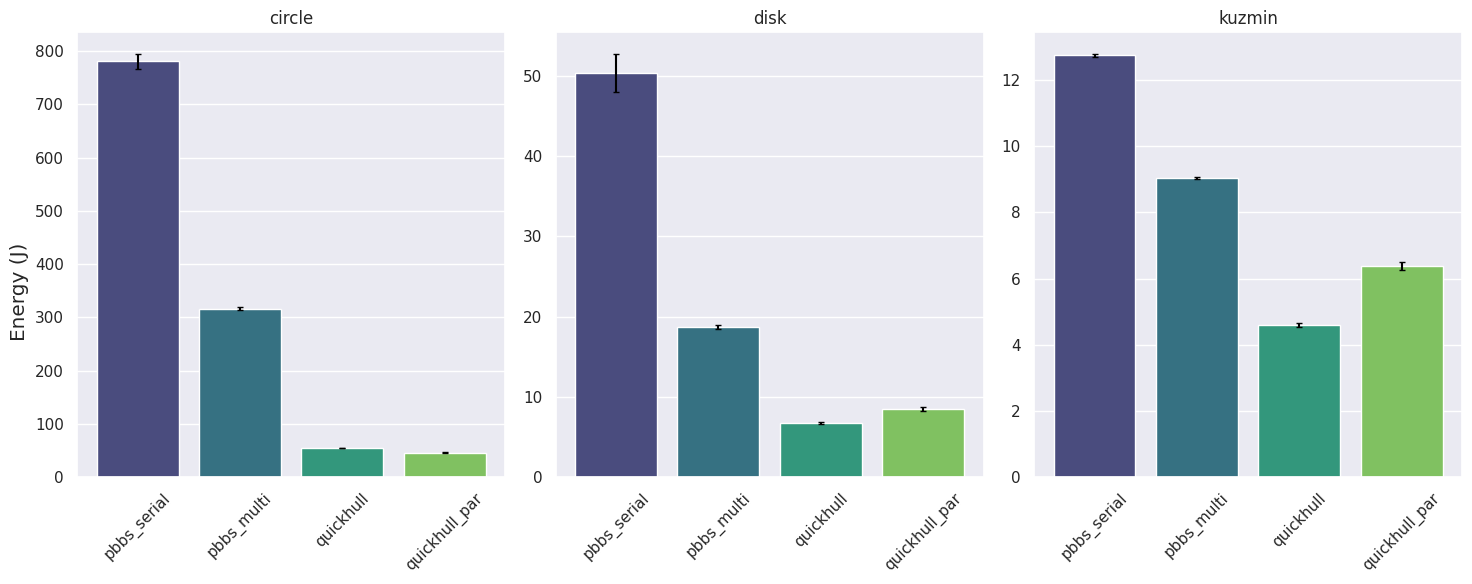

In [3]:
cn125 = pd.read_csv('cn125.csv')
plot(cn125, 'Runtime (s)', 'Runtime SD')
plot(cn125, 'Energy (J)', 'Energy SD')

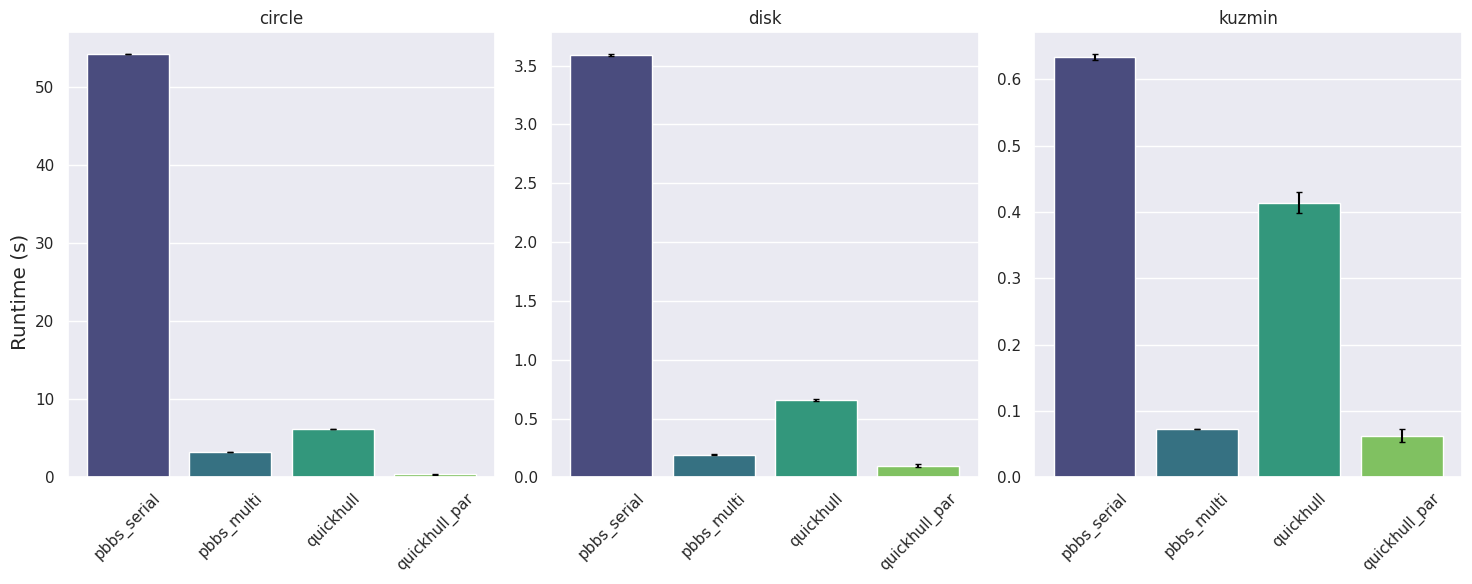

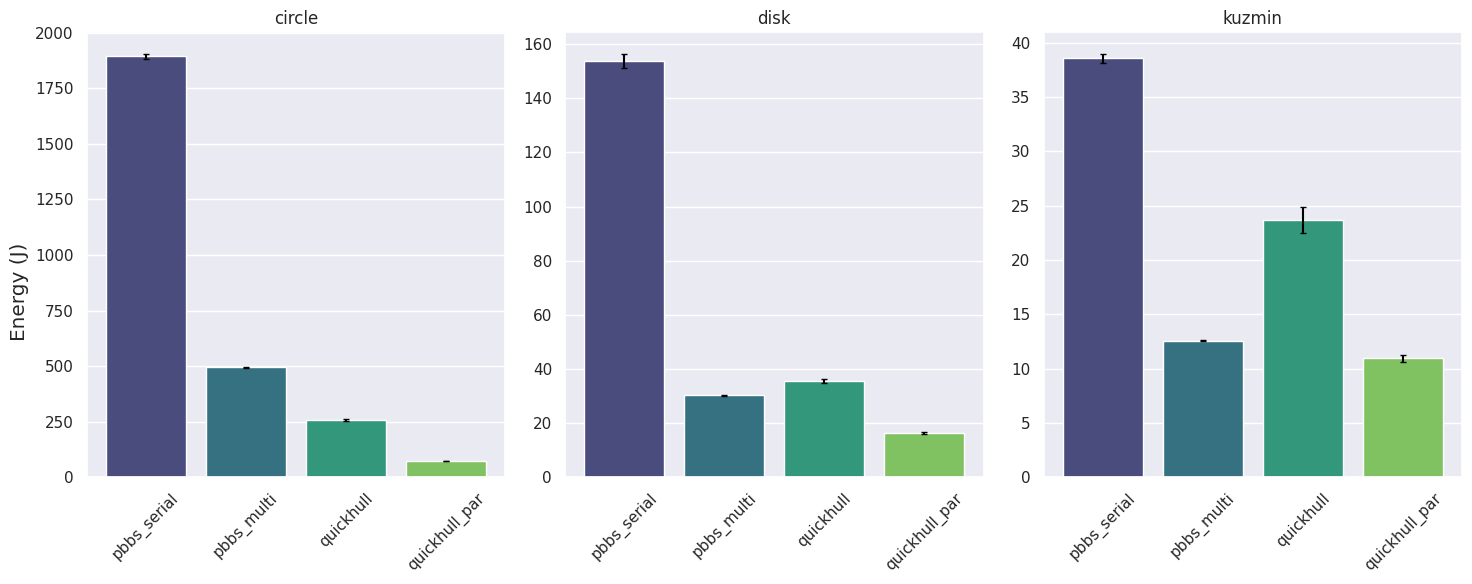

In [4]:
cn132 = pd.read_csv('cn132.csv')
cn132['Energy (J)'] = cn132['CPU1 (J)'] + cn132['CPU2 (J)']
cn132['Energy SD'] = (cn132['CPU1 SD'] + cn132['CPU2 SD']) / 2
plot(cn132, 'Runtime (s)', 'Runtime SD')
plot(cn132, 'Energy (J)', 'Energy SD')